In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.signal
import scipy
import pickle
import os
from tqdm import tqdm
import pandas as pd
tqdm.pandas()

In [2]:
def kde(x,y, w = 0.005):
    bins = len(x)
    xy = np.r_[x, y]
    hh,loc = scipy.histogram(xy, bins=bins)
    kernel = scipy.stats.norm.pdf((loc[1:]+loc[:-1]) * .5, 0, w)
    return scipy.signal.fftconvolve(hh, kernel, 'same')

In [3]:
PATH_64PX = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_fulltile/'
PATH_32PX = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_32px_fulltile/'
PATH = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'

In [4]:
no_files = len(os.listdir(PATH_32PX+'DataCubes'))
print(no_files)

163


In [5]:
df = pd.DataFrame(columns = ['ColumnDensity','H_32px','H_64px','S_64px','S_32px', 'Lon','Lat'])
df

,ColumnDensity,H_32px,H_64px,S_64px,S_32px,Lon,Lat


In [6]:
for i in tqdm(range(no_files)):
    temp_df = pd.DataFrame()
    cube_64px = pickle.load(open(f'{PATH_64PX}/DataCubes/{os.listdir(PATH_64PX+"DataCubes")[i]}','rb'))
    cube_32px = pickle.load(open(f'{PATH_32PX}/DataCubes/{os.listdir(PATH_32PX+"DataCubes")[i]}','rb'))
    temp_df['ColumnDensity'] = cube_32px[0].flatten()
    temp_df['H_32px'] = cube_32px[1].flatten()
    temp_df['H_64px'] = cube_64px[1].flatten()
    temp_df['S_64px'] = cube_64px[2].flatten()
    temp_df['S_32px'] = cube_32px[2].flatten()
    temp_df['Lon'] = cube_32px[3].flatten()
    temp_df['Lat'] = cube_32px[4].flatten()
    temp_df = temp_df.dropna()
    temp_df = temp_df.drop_duplicates()
    df = df.append(temp_df)
    
df

100%|█████████████████████████████████████████████████████████████████████████████| 163/163 [1:24:05<00:00, 143.76s/it]


,ColumnDensity,H_32px,H_64px,S_64px,S_32px,Lon,Lat
90901,43.848316,1.132676,1.013105,0.182611,0.932583,0.878091,-1.054206
90902,44.163925,1.131395,1.007516,0.172928,0.909421,0.876424,-1.054207
90903,44.504650,1.129157,1.001265,0.163932,0.889960,0.874758,-1.054207
90904,44.041813,1.127536,0.994067,0.161262,0.872796,0.873091,-1.054208
90905,42.832348,1.122884,0.987209,0.158186,0.857919,0.871425,-1.054208
90906,41.700336,1.118570,0.980999,0.161780,0.843186,0.869759,-1.054209
90907,40.950253,1.111601,0.972918,0.168550,0.832900,0.868092,-1.054209
90908,40.580994,1.104042,0.963802,0.178542,0.822975,0.866426,-1.054210
90909,40.359810,1.096378,0.954857,0.185698,0.810874,0.864759,-1.054210
90910,39.793751,1.090280,0.948325,0.195599,0.797607,0.863093,-1.054211


In [9]:
df_sample = df.sample(int(1e8))
df_sample.to_csv(f'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/smollish.csv', index=False)
df_sample

,ColumnDensity,H_32px,H_64px,S_64px,S_32px,Lon,Lat
226258,16.617556,0.935781,0.744904,-0.045658,0.634258,33.930909,-0.973819
542207,8.792541,0.318732,0.413690,0.099901,0.280226,204.549487,-1.091726
725623,27.856632,0.866354,0.884089,1.097555,1.156127,287.263367,-1.108816
1016017,32.400276,0.770213,0.755029,0.679193,0.800491,54.871695,0.143325
404517,46.990986,0.823447,0.761699,0.332809,0.701057,353.229302,-0.773092
1145891,14.859363,0.535918,0.427637,0.041404,0.413717,221.554830,-0.811918
650244,25.750910,0.622122,0.455726,0.039083,0.418001,120.894813,0.836843
819235,30.584942,0.557347,0.386049,-0.182282,0.303445,148.582879,0.526027
1392349,22.543947,0.753075,0.580652,0.114171,0.490335,102.446010,1.708552
944179,17.416805,0.762283,0.679244,0.748138,1.077271,118.402642,1.196737


In [8]:
df.to_csv(f'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/big.csv', index=False)

In [7]:
df_sample['KDE_H32_H64'] = kde(df_sample.H_32px,df_sample.H_64px, w=0.0015)
df_sample['KDE_H32_S32'] = kde(df_sample.H_32px,df_sample.S_32px)
df_sample['KDE_H32_S64'] = kde(df_sample.H_32px,df_sample.S_64px)
df_sample['KDE_H64_S32'] = kde(df_sample.H_64px,df_sample.S_32px)
df_sample['KDE_H64_S64'] = kde(df_sample.H_64px,df_sample.S_64px)
df_sample['KDE_S32_S64'] = kde(df_sample.S_32px,df_sample.S_64px)

df_sample['KDE_H32_lon'] = kde(df_sample.H_32px,df_sample.Lon, w=0.0001)
df_sample['KDE_H64_lon'] = kde(df_sample.H_64px,df_sample.Lon, w=0.0001)
df_sample['KDE_S32_lon'] = kde(df_sample.S_32px,df_sample.Lon, w=0.00005)
df_sample['KDE_S64_lon'] = kde(df_sample.S_64px,df_sample.Lon, w=0.0001)



C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  after removing the cwd from sys.path.


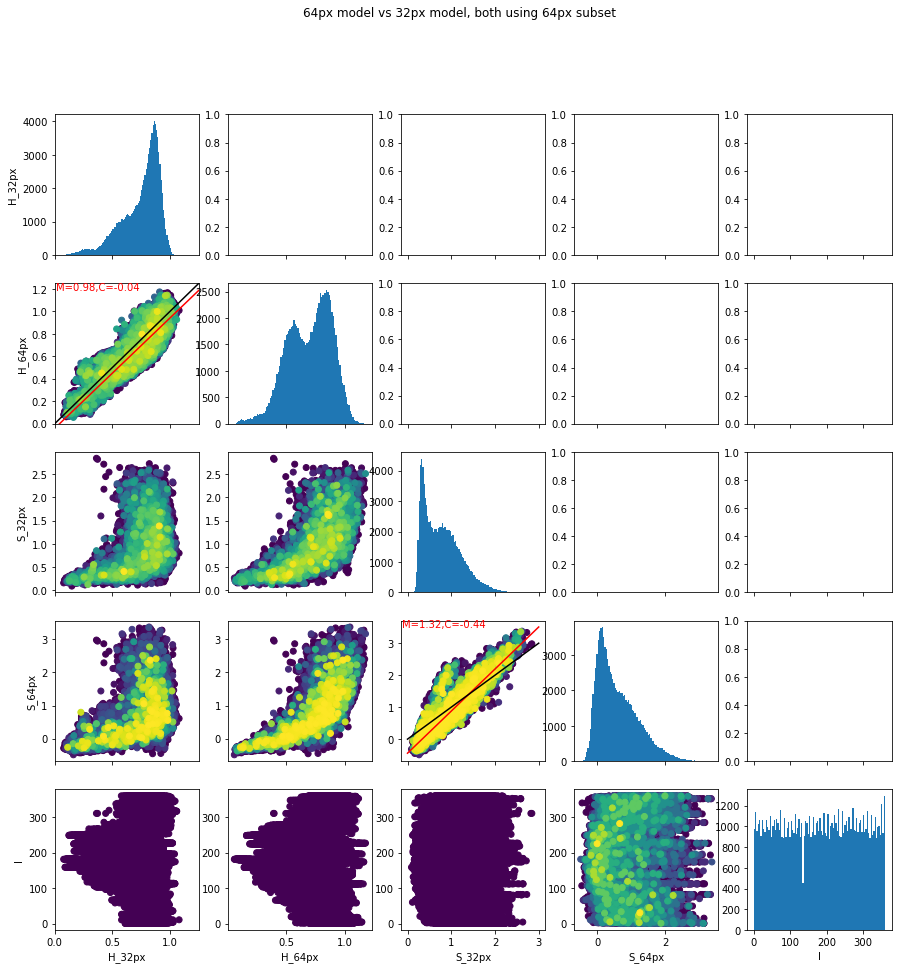

In [8]:
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df_sample['H_32px'], bins=100)
ax[1,1].hist(df_sample['H_64px'], bins=100)
ax[2,2].hist(df_sample['S_32px'], bins=100)
ax[3,3].hist(df_sample['S_64px'], bins=100)
ax[4,4].hist(df_sample['Lon'], bins=100)

##1

df_sample = df_sample.sort_values(by=['KDE_H32_H64'])
ax[1,0].scatter(df_sample['H_32px'],df_sample['H_64px'],c=df_sample['KDE_H32_H64'])
z = np.polyfit(df_sample['H_32px'], df_sample['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')

##2

df_sample = df_sample.sort_values(by=['KDE_H32_S32'])
ax[2,0].scatter(df_sample['H_32px'],df_sample['S_32px'],c=df_sample['KDE_H32_S32'])

df_sample = df_sample.sort_values(by=['KDE_H64_S32'])
ax[2,1].scatter(df_sample['H_64px'],df_sample['S_32px'],c=df_sample['KDE_H64_S32'])

###3

df_sample = df_sample.sort_values(by=['KDE_H32_S64'])
ax[3,0].scatter(df_sample['H_32px'],df_sample['S_64px'],c=df_sample['KDE_H32_S64'])

df_sample = df_sample.sort_values(by=['KDE_H64_S64'])
ax[3,1].scatter(df_sample['H_64px'],df_sample['S_64px'],c=df_sample['KDE_H64_S64'])

df_sample = df_sample.sort_values(by=['KDE_S32_S64'])
ax[3,2].scatter(df_sample['S_32px'],df_sample['S_64px'],c=df_sample['KDE_S32_S64'])
z = np.polyfit(df_sample['S_32px'], df_sample['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

##4

df_sample = df_sample.sort_values(by=['KDE_H32_lon'])
ax[4,0].scatter(df_sample['H_32px'],df_sample['Lon'],c=df_sample['KDE_H32_lon'])

df_sample = df_sample.sort_values(by=['KDE_H64_lon'])
ax[4,1].scatter(df_sample['H_64px'],df_sample['Lon'],c=df_sample['KDE_H64_lon'])

df_sample = df_sample.sort_values(by=['KDE_S32_lon'])
ax[4,2].scatter(df_sample['S_32px'],df_sample['Lon'],c=df_sample['KDE_S32_lon'])

df_sample = df_sample.sort_values(by=['KDE_S64_lon'])
ax[4,3].scatter(df_sample['S_64px'],df_sample['Lon'],c=df_sample['KDE_S64_lon'])

#labels

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')
ax[4,0].set_ylabel('l')

ax[-1,0].set_xlabel('H_32px')
ax[-1,1].set_xlabel('H_64px')
ax[-1,2].set_xlabel('S_32px')
ax[-1,3].set_xlabel('S_64px')
ax[-1,4].set_xlabel('l')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])
#H_64_mean = np.mean(df_sample[])
#H_32_mean = np.mean(df_sample[])

plt.suptitle('64px model vs 32px model, both using 64px subset')
#plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReduced.png')
plt.show()

In [9]:
df_towards = df_sample.loc[(df_sample['Lon']<90) | (df_sample['Lon']>270)]
df_towards

,ColumnDensity,H_32px,H_64px,S_64px,S_32px,Lon,Lat,KDE_H32_H64,KDE_H32_S32,KDE_H32_S64,KDE_H64_S32,KDE_H64_S64,KDE_S32_S64,KDE_H32_lon,KDE_H64_lon,KDE_S32_lon,KDE_S64_lon
881743,1.264459,0.846383,0.816077,1.111213,1.251284,285.629224,-0.171975,3.458460e-323,-1.750223e-66,4.768372e-12,1.391785e-40,1.430511e-11,-2.384186e-12,0.0,0.0,0.0,-1.496199e-22
78264,2.009215,0.922871,0.980807,1.226590,1.209114,336.976785,-0.673611,-2.964394e-323,-2.819804e-66,1.668930e-11,7.899322e-41,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-1.471804e-22
796211,1.878585,0.840617,0.826601,1.168031,1.096318,286.516068,-0.313670,-1.482197e-323,-1.847458e-66,1.907349e-11,3.949661e-41,-1.430511e-11,-7.152557e-12,0.0,0.0,0.0,-1.431147e-22
958444,1.310374,0.814667,0.644202,0.215168,0.688470,74.917397,1.663509,8.399116e-323,-3.986619e-66,-1.430511e-11,6.394689e-41,0.000000e+00,-3.576279e-11,0.0,0.0,0.0,-1.222438e-22
565217,2.181190,0.840062,0.785516,0.478154,0.603175,22.496582,0.069118,-2.470328e-323,-4.181088e-66,2.384186e-11,5.830452e-41,0.000000e+00,-9.536743e-12,0.0,0.0,0.0,-1.132677e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625256,2.080899,0.827188,0.899582,1.234599,1.327787,2.587409,0.250362,4.482494e-308,7.859371e-52,1.946484e+04,3.074685e-26,1.946484e+04,4.081050e+04,0.0,0.0,0.0,2.771602e-08
874441,1.450516,0.965995,0.837543,0.370937,0.779207,4.520619,0.583848,3.725299e-308,3.888569e-52,1.442148e+04,3.047908e-26,1.442148e+04,2.664638e+04,0.0,0.0,0.0,2.771602e-08
140565,1.333327,0.813584,0.617644,0.117312,0.522302,270.528910,-1.707954,4.940656e-323,-1.361285e-66,4.973070e+02,-1.786751e-41,4.973070e+02,5.040393e+02,0.0,0.0,0.0,2.771602e-08
761552,1.674523,0.936884,0.870012,0.659984,0.858563,281.548836,-0.481737,1.439016e-308,2.761835e-51,1.188547e+05,7.601675e-26,1.268787e+05,1.141821e+05,0.0,0.0,0.0,3.167545e-08


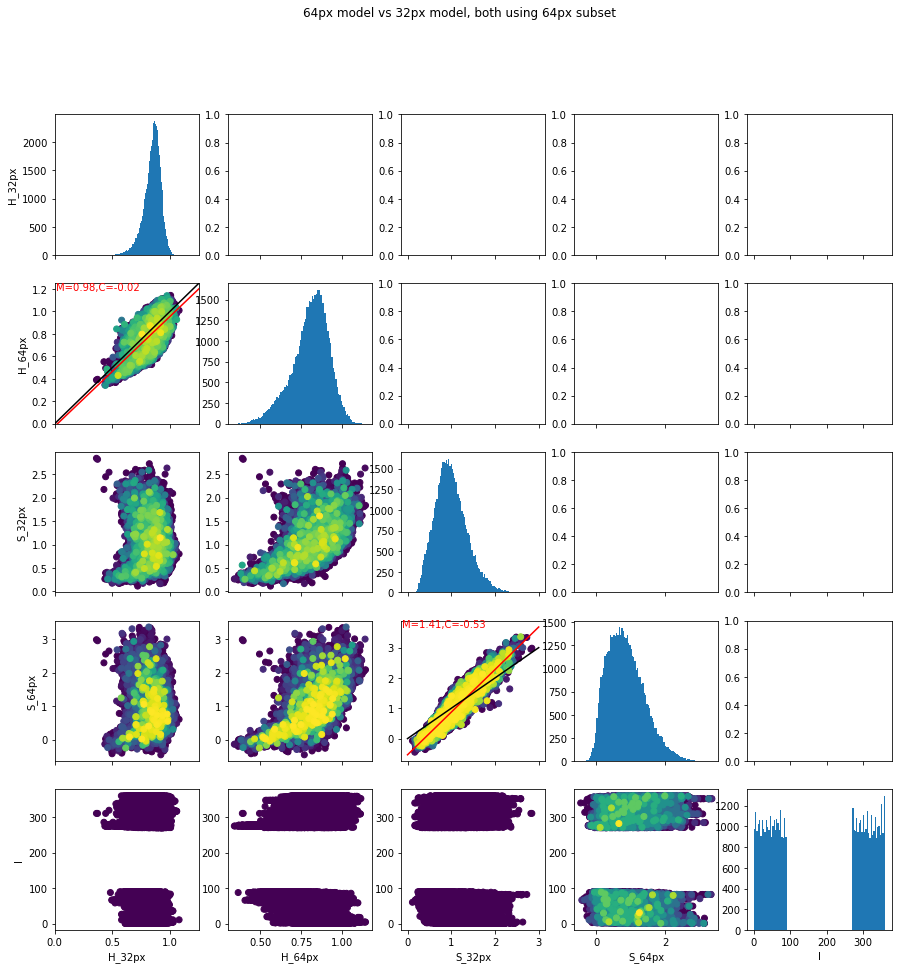

In [10]:
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df_towards['H_32px'], bins=100)
ax[1,1].hist(df_towards['H_64px'], bins=100)
ax[2,2].hist(df_towards['S_32px'], bins=100)
ax[3,3].hist(df_towards['S_64px'], bins=100)
ax[4,4].hist(df_towards['Lon'], bins=100)

##1

df_towards = df_towards.sort_values(by=['KDE_H32_H64'])
ax[1,0].scatter(df_towards['H_32px'],df_towards['H_64px'],c=df_towards['KDE_H32_H64'])
z = np.polyfit(df_towards['H_32px'], df_towards['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')

##2

df_towards = df_towards.sort_values(by=['KDE_H32_S32'])
ax[2,0].scatter(df_towards['H_32px'],df_towards['S_32px'],c=df_towards['KDE_H32_S32'])

df_towards = df_towards.sort_values(by=['KDE_H64_S32'])
ax[2,1].scatter(df_towards['H_64px'],df_towards['S_32px'],c=df_towards['KDE_H64_S32'])

###3

df_towards = df_towards.sort_values(by=['KDE_H32_S64'])
ax[3,0].scatter(df_towards['H_32px'],df_towards['S_64px'],c=df_towards['KDE_H32_S64'])

df_towards = df_towards.sort_values(by=['KDE_H64_S64'])
ax[3,1].scatter(df_towards['H_64px'],df_towards['S_64px'],c=df_towards['KDE_H64_S64'])

df_towards = df_towards.sort_values(by=['KDE_S32_S64'])
ax[3,2].scatter(df_towards['S_32px'],df_towards['S_64px'],c=df_towards['KDE_S32_S64'])
z = np.polyfit(df_towards['S_32px'], df_towards['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

##4

df_towards = df_towards.sort_values(by=['KDE_H32_lon'])
ax[4,0].scatter(df_towards['H_32px'],df_towards['Lon'],c=df_towards['KDE_H32_lon'])

df_towards = df_towards.sort_values(by=['KDE_H64_lon'])
ax[4,1].scatter(df_towards['H_64px'],df_towards['Lon'],c=df_towards['KDE_H64_lon'])

df_towards = df_towards.sort_values(by=['KDE_S32_lon'])
ax[4,2].scatter(df_towards['S_32px'],df_towards['Lon'],c=df_towards['KDE_S32_lon'])

df_towards = df_towards.sort_values(by=['KDE_S64_lon'])
ax[4,3].scatter(df_towards['S_64px'],df_towards['Lon'],c=df_towards['KDE_S64_lon'])

#labels

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')
ax[4,0].set_ylabel('l')

ax[-1,0].set_xlabel('H_32px')
ax[-1,1].set_xlabel('H_64px')
ax[-1,2].set_xlabel('S_32px')
ax[-1,3].set_xlabel('S_64px')
ax[-1,4].set_xlabel('l')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

plt.suptitle('64px model vs 32px model, both using 64px subset')
#plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReduced.png')
plt.show()

In [11]:
df_away = df_sample.loc[(df_sample['Lon']>90) & (df_sample['Lon']<270)]
df_away

,ColumnDensity,H_32px,H_64px,S_64px,S_32px,Lon,Lat,KDE_H32_H64,KDE_H32_S32,KDE_H32_S64,KDE_H64_S32,KDE_H64_S64,KDE_S32_S64,KDE_H32_lon,KDE_H64_lon,KDE_S32_lon,KDE_S64_lon
930576,1.394826,0.463399,0.362422,-0.098574,0.307425,123.108046,1.980901,4.940656e-323,-3.694915e-66,0.000000e+00,7.711243e-41,-1.430511e-11,1.192093e-11,0.0,0.0,0.0,-1.263096e-22
707550,1.696823,0.987748,1.021132,1.039951,1.075317,112.152388,1.687754,1.482197e-323,-9.772079e-66,1.430511e-11,1.579864e-40,-9.536743e-12,9.536743e-12,0.0,0.0,0.0,-1.224487e-22
631881,1.639495,0.780786,0.806151,1.096347,1.118341,93.991371,1.467728,9.881313e-324,-3.500446e-66,1.192093e-11,9.592034e-41,-4.768372e-12,-1.192093e-11,0.0,0.0,0.0,-1.127570e-22
409583,1.344999,0.605484,0.529759,0.082469,0.361657,255.096870,-1.354281,-1.976263e-323,-1.507137e-66,0.000000e+00,1.391785e-40,-1.907349e-11,-7.152557e-12,0.0,0.0,0.0,-1.122149e-22
973955,0.701499,0.569674,0.582338,0.304063,0.339035,214.870729,0.031271,5.928788e-323,-1.652988e-66,4.768372e-12,1.617480e-40,1.907349e-11,-7.152557e-12,0.0,0.0,0.0,-1.111307e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513948,1.121919,0.546280,0.477638,-0.062961,0.275226,170.880574,0.334554,2.738278e-308,4.182232e-52,6.064968e+03,1.046794e-26,6.064968e+03,1.016484e+04,0.0,0.0,0.0,2.771602e-08
850485,1.363038,0.870760,0.747022,0.894791,1.206248,118.859507,1.888579,4.883756e-308,4.125115e-52,9.197762e+03,1.448485e-26,9.197762e+03,1.652538e+04,0.0,0.0,0.0,2.771602e-08
655370,1.363217,0.627888,0.471737,-0.027173,0.437825,123.451588,1.522470,2.462412e-308,1.291326e-51,2.964100e+04,4.339777e-26,2.964100e+04,7.071687e+04,0.0,0.0,0.0,2.771602e-08
942559,0.643068,0.246259,0.526302,0.674049,0.368230,239.734806,-0.391250,1.651844e-308,3.220563e-52,4.680191e+03,1.513376e-26,4.680191e+03,7.437506e+03,0.0,0.0,0.0,2.771602e-08


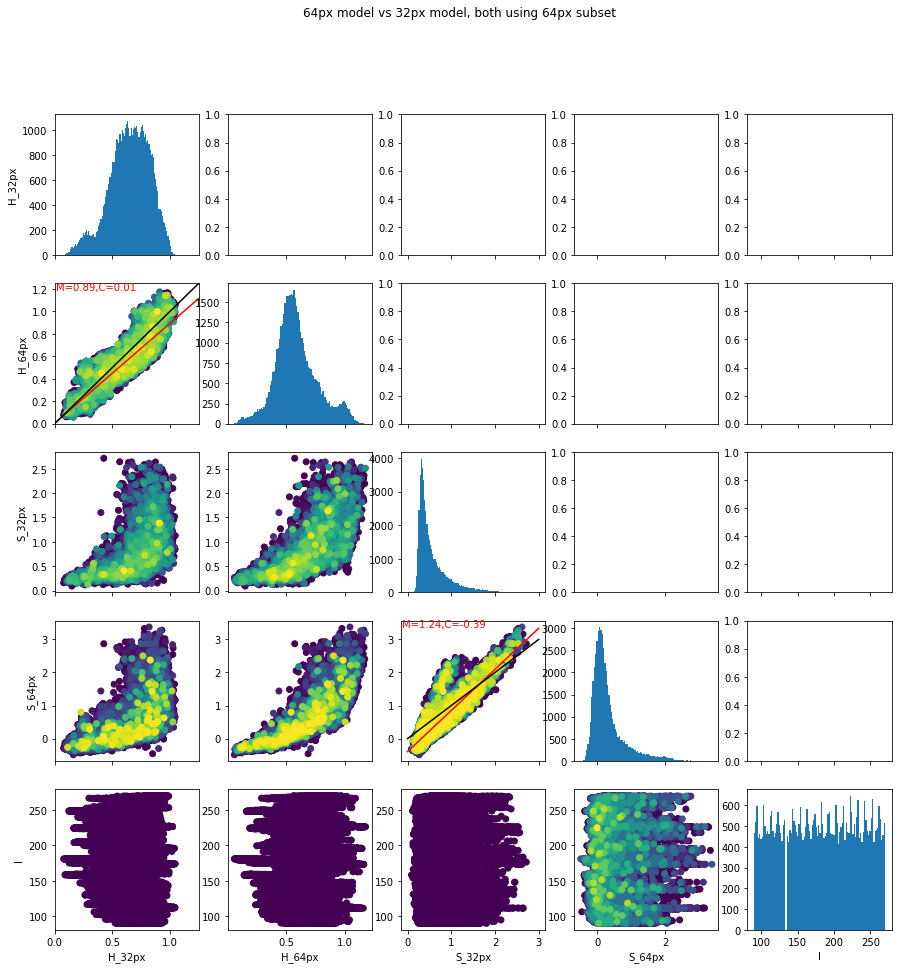

In [12]:
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df_away['H_32px'], bins=100)
ax[1,1].hist(df_away['H_64px'], bins=100)
ax[2,2].hist(df_away['S_32px'], bins=100)
ax[3,3].hist(df_away['S_64px'], bins=100)
ax[4,4].hist(df_away['Lon'], bins=100)

##1

df_away = df_away.sort_values(by=['KDE_H32_H64'])
ax[1,0].scatter(df_away['H_32px'],df_away['H_64px'],c=df_away['KDE_H32_H64'])
z = np.polyfit(df_away['H_32px'], df_away['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')

##2

df_away = df_away.sort_values(by=['KDE_H32_S32'])
ax[2,0].scatter(df_away['H_32px'],df_away['S_32px'],c=df_away['KDE_H32_S32'])

df_away = df_away.sort_values(by=['KDE_H64_S32'])
ax[2,1].scatter(df_away['H_64px'],df_away['S_32px'],c=df_away['KDE_H64_S32'])

###3

df_away = df_away.sort_values(by=['KDE_H32_S64'])
ax[3,0].scatter(df_away['H_32px'],df_away['S_64px'],c=df_away['KDE_H32_S64'])

df_away = df_away.sort_values(by=['KDE_H64_S64'])
ax[3,1].scatter(df_away['H_64px'],df_away['S_64px'],c=df_away['KDE_H64_S64'])

df_away = df_away.sort_values(by=['KDE_S32_S64'])
ax[3,2].scatter(df_away['S_32px'],df_away['S_64px'],c=df_away['KDE_S32_S64'])
z = np.polyfit(df_away['S_32px'], df_away['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

##4

df_away = df_away.sort_values(by=['KDE_H32_lon'])
ax[4,0].scatter(df_away['H_32px'],df_away['Lon'],c=df_away['KDE_H32_lon'])

df_away = df_away.sort_values(by=['KDE_H64_lon'])
ax[4,1].scatter(df_away['H_64px'],df_away['Lon'],c=df_away['KDE_H64_lon'])

df_away = df_away.sort_values(by=['KDE_S32_lon'])
ax[4,2].scatter(df_away['S_32px'],df_away['Lon'],c=df_away['KDE_S32_lon'])

df_away = df_away.sort_values(by=['KDE_S64_lon'])
ax[4,3].scatter(df_away['S_64px'],df_away['Lon'],c=df_away['KDE_S64_lon'])

#labels

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')
ax[4,0].set_ylabel('l')

ax[-1,0].set_xlabel('H_32px')
ax[-1,1].set_xlabel('H_64px')
ax[-1,2].set_xlabel('S_32px')
ax[-1,3].set_xlabel('S_64px')
ax[-1,4].set_xlabel('l')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

plt.suptitle('64px model vs 32px model, both using 64px subset')
#plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReduced.png')
plt.show()

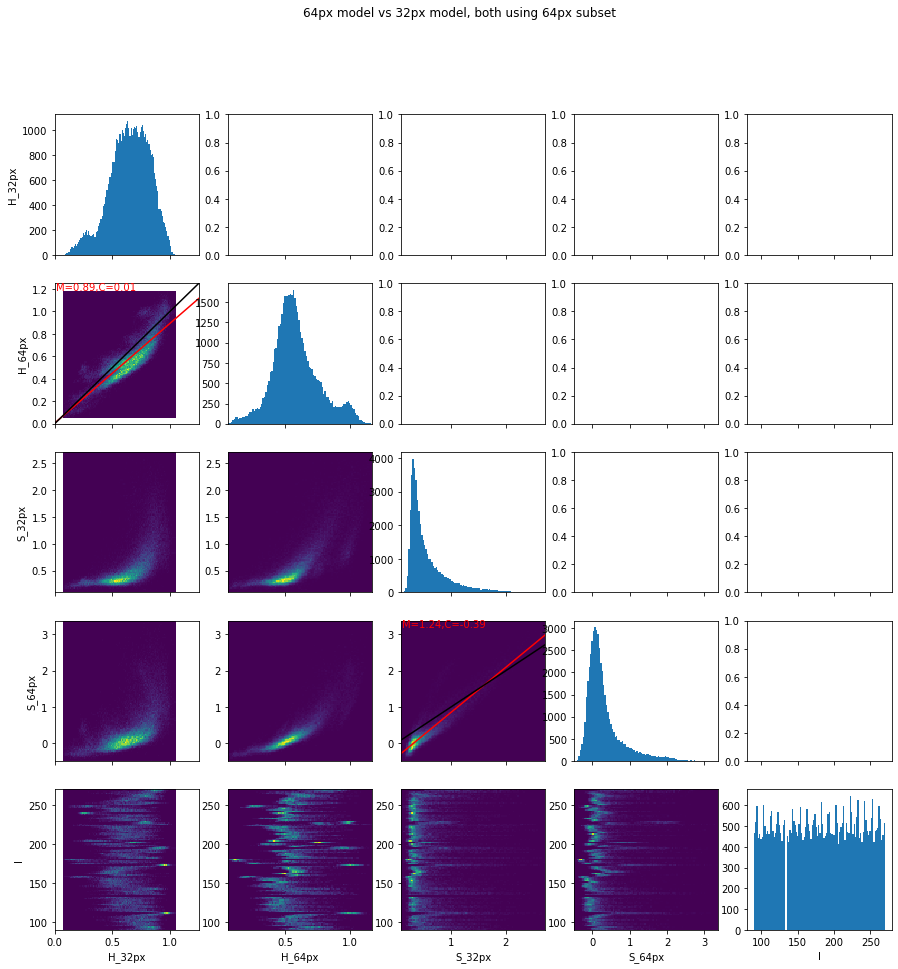

In [14]:
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df_away['H_32px'], bins=100)
ax[1,1].hist(df_away['H_64px'], bins=100)
ax[2,2].hist(df_away['S_32px'], bins=100)
ax[3,3].hist(df_away['S_64px'], bins=100)
ax[4,4].hist(df_away['Lon'], bins=100)

##1

df_away = df_away.sort_values(by=['KDE_H32_H64'])
ax[1,0].hist2d(df_away['H_32px'],df_away['H_64px'],bins=100)
z = np.polyfit(df_away['H_32px'], df_away['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')

##2

df_away = df_away.sort_values(by=['KDE_H32_S32'])
ax[2,0].hist2d(df_away['H_32px'],df_away['S_32px'],bins=100)

df_away = df_away.sort_values(by=['KDE_H64_S32'])
ax[2,1].hist2d(df_away['H_64px'],df_away['S_32px'],bins=100)

###3

df_away = df_away.sort_values(by=['KDE_H32_S64'])
ax[3,0].hist2d(df_away['H_32px'],df_away['S_64px'],bins=100)

df_away = df_away.sort_values(by=['KDE_H64_S64'])
ax[3,1].hist2d(df_away['H_64px'],df_away['S_64px'],bins=100)

df_away = df_away.sort_values(by=['KDE_S32_S64'])
ax[3,2].hist2d(df_away['S_32px'],df_away['S_64px'],bins=100)
z = np.polyfit(df_away['S_32px'], df_away['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

##4

df_away = df_away.sort_values(by=['KDE_H32_lon'])
ax[4,0].hist2d(df_away['H_32px'],df_away['Lon'],bins=100)

df_away = df_away.sort_values(by=['KDE_H64_lon'])
ax[4,1].hist2d(df_away['H_64px'],df_away['Lon'],bins=100)

df_away = df_away.sort_values(by=['KDE_S32_lon'])
ax[4,2].hist2d(df_away['S_32px'],df_away['Lon'],bins=100)

df_away = df_away.sort_values(by=['KDE_S64_lon'])
ax[4,3].hist2d(df_away['S_64px'],df_away['Lon'],bins=100)

#labels

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')
ax[4,0].set_ylabel('l')

ax[-1,0].set_xlabel('H_32px')
ax[-1,1].set_xlabel('H_64px')
ax[-1,2].set_xlabel('S_32px')
ax[-1,3].set_xlabel('S_64px')
ax[-1,4].set_xlabel('l')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

plt.suptitle('64px model vs 32px model, both using 64px subset')
#plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReduced.png')
plt.show()

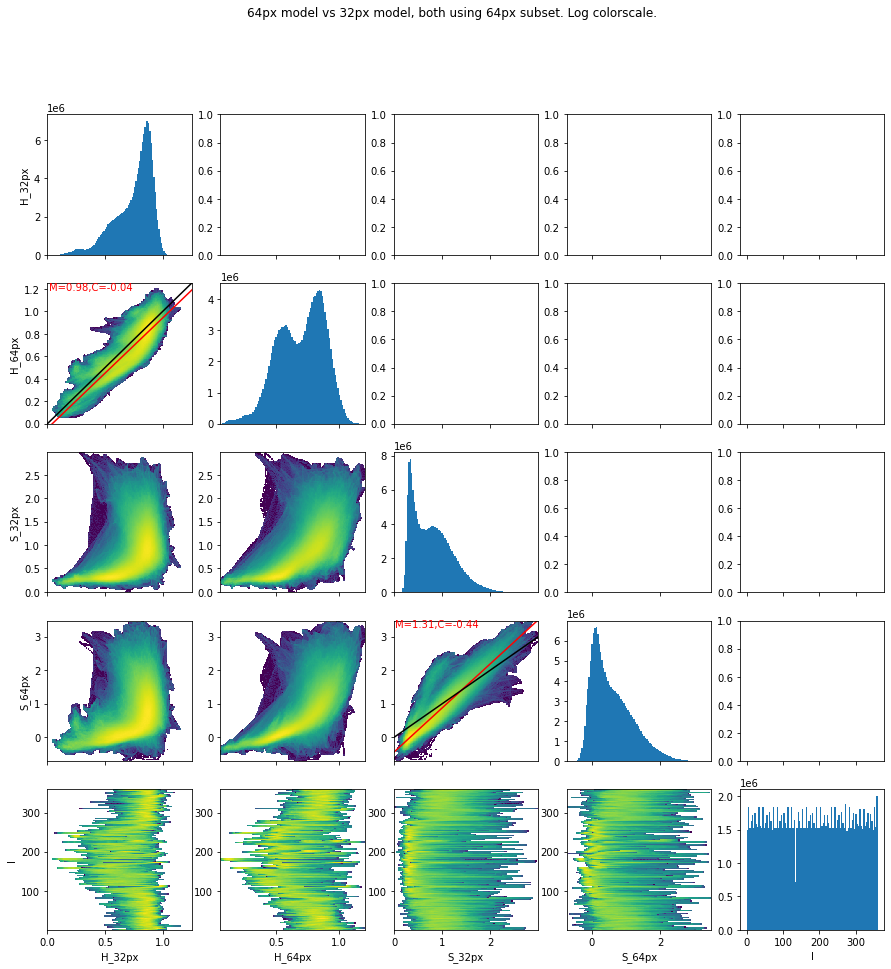

In [15]:
import matplotlib as mpl
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df['H_32px'], bins=100)
ax[1,1].hist(df['H_64px'], bins=100)
ax[2,2].hist(df['S_32px'], bins=100)
ax[3,3].hist(df['S_64px'], bins=100)
ax[4,4].hist(df['Lon'], bins=100)

##1

ax[1,0].hist2d(df['H_32px'],df['H_64px'],bins=200, norm=mpl.colors.LogNorm())
z = np.polyfit(df['H_32px'], df['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')

##2

ax[2,0].hist2d(df['H_32px'],df['S_32px'],bins=200, norm=mpl.colors.LogNorm())

ax[2,1].hist2d(df['H_64px'],df['S_32px'],bins=200, norm=mpl.colors.LogNorm())

###3

ax[3,0].hist2d(df['H_32px'],df['S_64px'],bins=200, norm=mpl.colors.LogNorm())

ax[3,1].hist2d(df['H_64px'],df['S_64px'],bins=200, norm=mpl.colors.LogNorm())

ax[3,2].hist2d(df['S_32px'],df['S_64px'],bins=200, norm=mpl.colors.LogNorm())
z = np.polyfit(df['S_32px'], df['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

##4

ax[4,0].hist2d(df['H_32px'],df['Lon'],bins=200, norm=mpl.colors.LogNorm())

ax[4,1].hist2d(df['H_64px'],df['Lon'],bins=200, norm=mpl.colors.LogNorm())

ax[4,2].hist2d(df['S_32px'],df['Lon'],bins=200, norm=mpl.colors.LogNorm())

ax[4,3].hist2d(df['S_64px'],df['Lon'],bins=200, norm=mpl.colors.LogNorm())

#labels

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')
ax[4,0].set_ylabel('l')

ax[-1,0].set_xlabel('H_32px')
ax[-1,1].set_xlabel('H_64px')
ax[-1,2].set_xlabel('S_32px')
ax[-1,3].set_xlabel('S_64px')
ax[-1,4].set_xlabel('l')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

plt.suptitle('64px model vs 32px model, both using 64px subset. Log colorscale.')
plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReduced.png')
plt.show()

In [16]:
df['Lon_shifted'] = df['Lon'].where(df['Lon']<270, df['Lon']-360)
df.sort_values(by=['Lon_shifted'])

,ColumnDensity,H_32px,H_64px,S_64px,S_32px,Lon,Lat,Lon_shifted
882,1.398716,0.934521,0.722919,0.249089,0.435185,270.000216,-1.941268,-89.999784
1882,1.394559,0.931936,0.731425,0.233779,0.419735,270.000216,-1.939601,-89.999784
2882,1.391924,0.928382,0.728748,0.232363,0.422580,270.000217,-1.937934,-89.999783
3882,1.394170,0.924522,0.730139,0.230195,0.412194,270.000217,-1.936267,-89.999783
4882,1.399613,0.922281,0.729354,0.227828,0.409311,270.000217,-1.934600,-89.999783
...,...,...,...,...,...,...,...,...
995883,1.456621,0.870480,0.750637,0.509037,0.901044,269.998903,-0.282603,269.998903
996883,1.454919,0.870093,0.749637,0.505458,0.898196,269.998903,-0.280936,269.998903
997883,1.455572,0.868520,0.747963,0.502209,0.888171,269.998903,-0.279269,269.998903
998883,1.460564,0.867727,0.748337,0.487768,0.889904,269.998904,-0.277602,269.998904


In [17]:
df_towards = df.loc[(df['Lon']<90) | (df['Lon']>270)]
df_towards

,ColumnDensity,H_32px,H_64px,S_64px,S_32px,Lon,Lat,Lon_shifted
0,1.873822,0.835795,0.931886,1.267645,1.042145,0.813110,-0.792632,0.813110
1,1.873830,0.846375,0.928312,1.254085,1.015743,0.811443,-0.792633,0.811443
2,1.873865,0.847870,0.932165,1.278373,1.036227,0.809777,-0.792633,0.809777
3,1.873432,0.844117,0.928094,1.267287,1.069077,0.808110,-0.792633,0.808110
4,1.871703,0.847032,0.922705,1.252017,1.094284,0.806444,-0.792634,0.806444
...,...,...,...,...,...,...,...,...
999995,1.655024,0.922453,0.917344,0.813730,0.901712,357.760679,0.862987,-2.239321
999996,1.648897,0.924066,0.914445,0.803117,0.908657,357.759012,0.862986,-2.240988
999997,1.643025,0.927520,0.914152,0.794454,0.903305,357.757346,0.862986,-2.242654
999998,1.638818,0.927754,0.912916,0.791375,0.911780,357.755679,0.862985,-2.244321


In [18]:
df_away = df.loc[(df['Lon']>90) & (df['Lon']<270)]
df_away

MemoryError: Unable to allocate 4.81 GiB for an array with shape (8, 80754000) and data type float64

In [ ]:
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df_towards['H_32px'], bins=100)
ax[1,1].hist(df_towards['H_64px'], bins=100)
ax[2,2].hist(df_towards['S_32px'], bins=100)
ax[3,3].hist(df_towards['S_64px'], bins=100)
ax[4,4].hist(df_towards['Lon_shifted'], bins=100)

##1

ax[1,0].hist2d(df_towards['H_32px'],df_towards['H_64px'],bins=200, norm=mpl.colors.LogNorm())
z = np.polyfit(df_towards['H_32px'], df_towards['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')

##2

ax[2,0].hist2d(df_towards['H_32px'],df_towards['S_32px'],bins=200, norm=mpl.colors.LogNorm())

ax[2,1].hist2d(df_towards['H_64px'],df_towards['S_32px'],bins=200, norm=mpl.colors.LogNorm())

###3

ax[3,0].hist2d(df_towards['H_32px'],df_towards['S_64px'],bins=200, norm=mpl.colors.LogNorm())

ax[3,1].hist2d(df_towards['H_64px'],df_towards['S_64px'],bins=200, norm=mpl.colors.LogNorm())

ax[3,2].hist2d(df_towards['S_32px'],df_towards['S_64px'],bins=200, norm=mpl.colors.LogNorm())
z = np.polyfit(df_towards['S_32px'], df_towards['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

##4

ax[4,0].hist2d(df_towards['H_32px'],df_towards['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

ax[4,1].hist2d(df_towards['H_64px'],df_towards['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

ax[4,2].hist2d(df_towards['S_32px'],df_towards['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

ax[4,3].hist2d(df_towards['S_64px'],df_towards['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

#labels

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')
ax[4,0].set_ylabel('l')

ax[-1,0].set_xlabel('H_32px')
ax[-1,1].set_xlabel('H_64px')
ax[-1,2].set_xlabel('S_32px')
ax[-1,3].set_xlabel('S_64px')
ax[-1,4].set_xlabel('l')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

plt.suptitle('64px model vs 32px model, both using 64px subset. Log colorscale.')
plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReducedCentric.png')
plt.show()

In [ ]:
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df_away['H_32px'], bins=100)
ax[1,1].hist(df_away['H_64px'], bins=100)
ax[2,2].hist(df_away['S_32px'], bins=100)
ax[3,3].hist(df_away['S_64px'], bins=100)
ax[4,4].hist(df_away['Lon_shifted'], bins=100)

##1

ax[1,0].hist2d(df_away['H_32px'],df_away['H_64px'],bins=200, norm=mpl.colors.LogNorm())
z = np.polyfit(df_away['H_32px'], df_away['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r')
ax[1,0].plot([0,2],[0,2],c='k')

##2

ax[2,0].hist2d(df_away['H_32px'],df_away['S_32px'],bins=200, norm=mpl.colors.LogNorm())

ax[2,1].hist2d(df_away['H_64px'],df_away['S_32px'],bins=200, norm=mpl.colors.LogNorm())

###3

ax[3,0].hist2d(df_away['H_32px'],df_away['S_64px'],bins=200, norm=mpl.colors.LogNorm())

ax[3,1].hist2d(df_away['H_64px'],df_away['S_64px'],bins=200, norm=mpl.colors.LogNorm())

ax[3,2].hist2d(df_away['S_32px'],df_away['S_64px'],bins=200, norm=mpl.colors.LogNorm())
z = np.polyfit(df_away['S_32px'], df_away['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.01, 0.95, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r')
ax[3,2].plot([0,3],[0,3],c='k')

##4

ax[4,0].hist2d(df_away['H_32px'],df_away['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

ax[4,1].hist2d(df_away['H_64px'],df_away['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

ax[4,2].hist2d(df_away['S_32px'],df_away['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

ax[4,3].hist2d(df_away['S_64px'],df_away['Lon_shifted'],bins=200, norm=mpl.colors.LogNorm())

#labels

ax[0,0].set_ylabel('H_32px')
ax[1,0].set_ylabel('H_64px')
ax[2,0].set_ylabel('S_32px')
ax[3,0].set_ylabel('S_64px')
ax[4,0].set_ylabel('l')

ax[-1,0].set_xlabel('H_32px')
ax[-1,1].set_xlabel('H_64px')
ax[-1,2].set_xlabel('S_32px')
ax[-1,3].set_xlabel('S_64px')
ax[-1,4].set_xlabel('l')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

plt.suptitle('64px model vs 32px model, both using 64px subset. Log colorscale.')
plt.savefig('D:/Workshop/PhD/Images/CNN Results PPMAP/64pxVS32pxReducedAntiCentric.png')
plt.show()